### Assignment 2 - CHM4390/8309A

A. Use numpy to calculate the Coulomb matrix for the methanol 3D structure provided as a sdf file. Hint: you should initialize a numpy array of arrays with zeros using <code>np.zeros((nrow, ncol))</code> where rows and columns represent the atoms (including hydrogens), and then populate it following the matrix structure seen in the slides in Lecture 3.

B. Use gradient descent to minimize the following non-convex function, that is, with multiple critical points

$$ f(x) = x^6 -134x^4 + 3625x^2 - 22500 $$ 

Start with x0 = -3. What do you observe? Can you think of a way to converge into the global minimum?

<h3><strong>Question 1</strong></h3>

In [9]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

# load methanol molecule
sdf_file = "/Users/marwanbakr/docs/uOttawa/2024-25/CHM4390 - Machine Learning for Chemistry/ethanol.sdf"
mol = Chem.SDMolSupplier(sdf_file, removeHs=False)[0]

# get atomic numbers and positions
atoms = mol.GetAtoms()
n_atoms = len(atoms)
atomic_numbers = np.array([atom.GetAtomicNum() for atom in atoms])

# atom 3d positions
conf = mol.GetConformer()
positions = np.array([conf.GetAtomPosition(i) for i in range(n_atoms)])

# initialize coulomb matrix
coulomb_matrix = np.zeros((n_atoms, n_atoms))

# fill coulomb matrix
for i in range(n_atoms):
    for j in range(n_atoms):
        if i == j:
            # diagonal elements: 0.5 * Z_i^2.4, where Z_i is the atomic number of atom i
            coulomb_matrix[i, j] = 0.5 * atomic_numbers[i] ** 2.4
        else:
            # off-diagonal elements: Z_i * Z_j / ||R_i - R_j||, where R_i and R_j are the positions of atoms i and j
            distance = np.linalg.norm(positions[i] - positions[j])
            coulomb_matrix[i, j] = atomic_numbers[i] * atomic_numbers[j] / distance

print(coulomb_matrix)


[[73.51669472 33.90309366  3.8882731   3.88853971  3.90167473  8.22719369]
 [33.90309366 36.8581052   5.49027102  5.49095452  5.49191437  3.09467101]
 [ 3.8882731   5.49027102  0.5         0.55832538  0.56081433  0.43640443]
 [ 3.88853971  5.49095452  0.55832538  0.5         0.56085707  0.43642621]
 [ 3.90167473  5.49191437  0.56081433  0.56085707  0.5         0.35175089]
 [ 8.22719369  3.09467101  0.43640443  0.43642621  0.35175089  0.5       ]]


<h3><strong>Question 2</strong></h3>

Gradient descent does not converge.


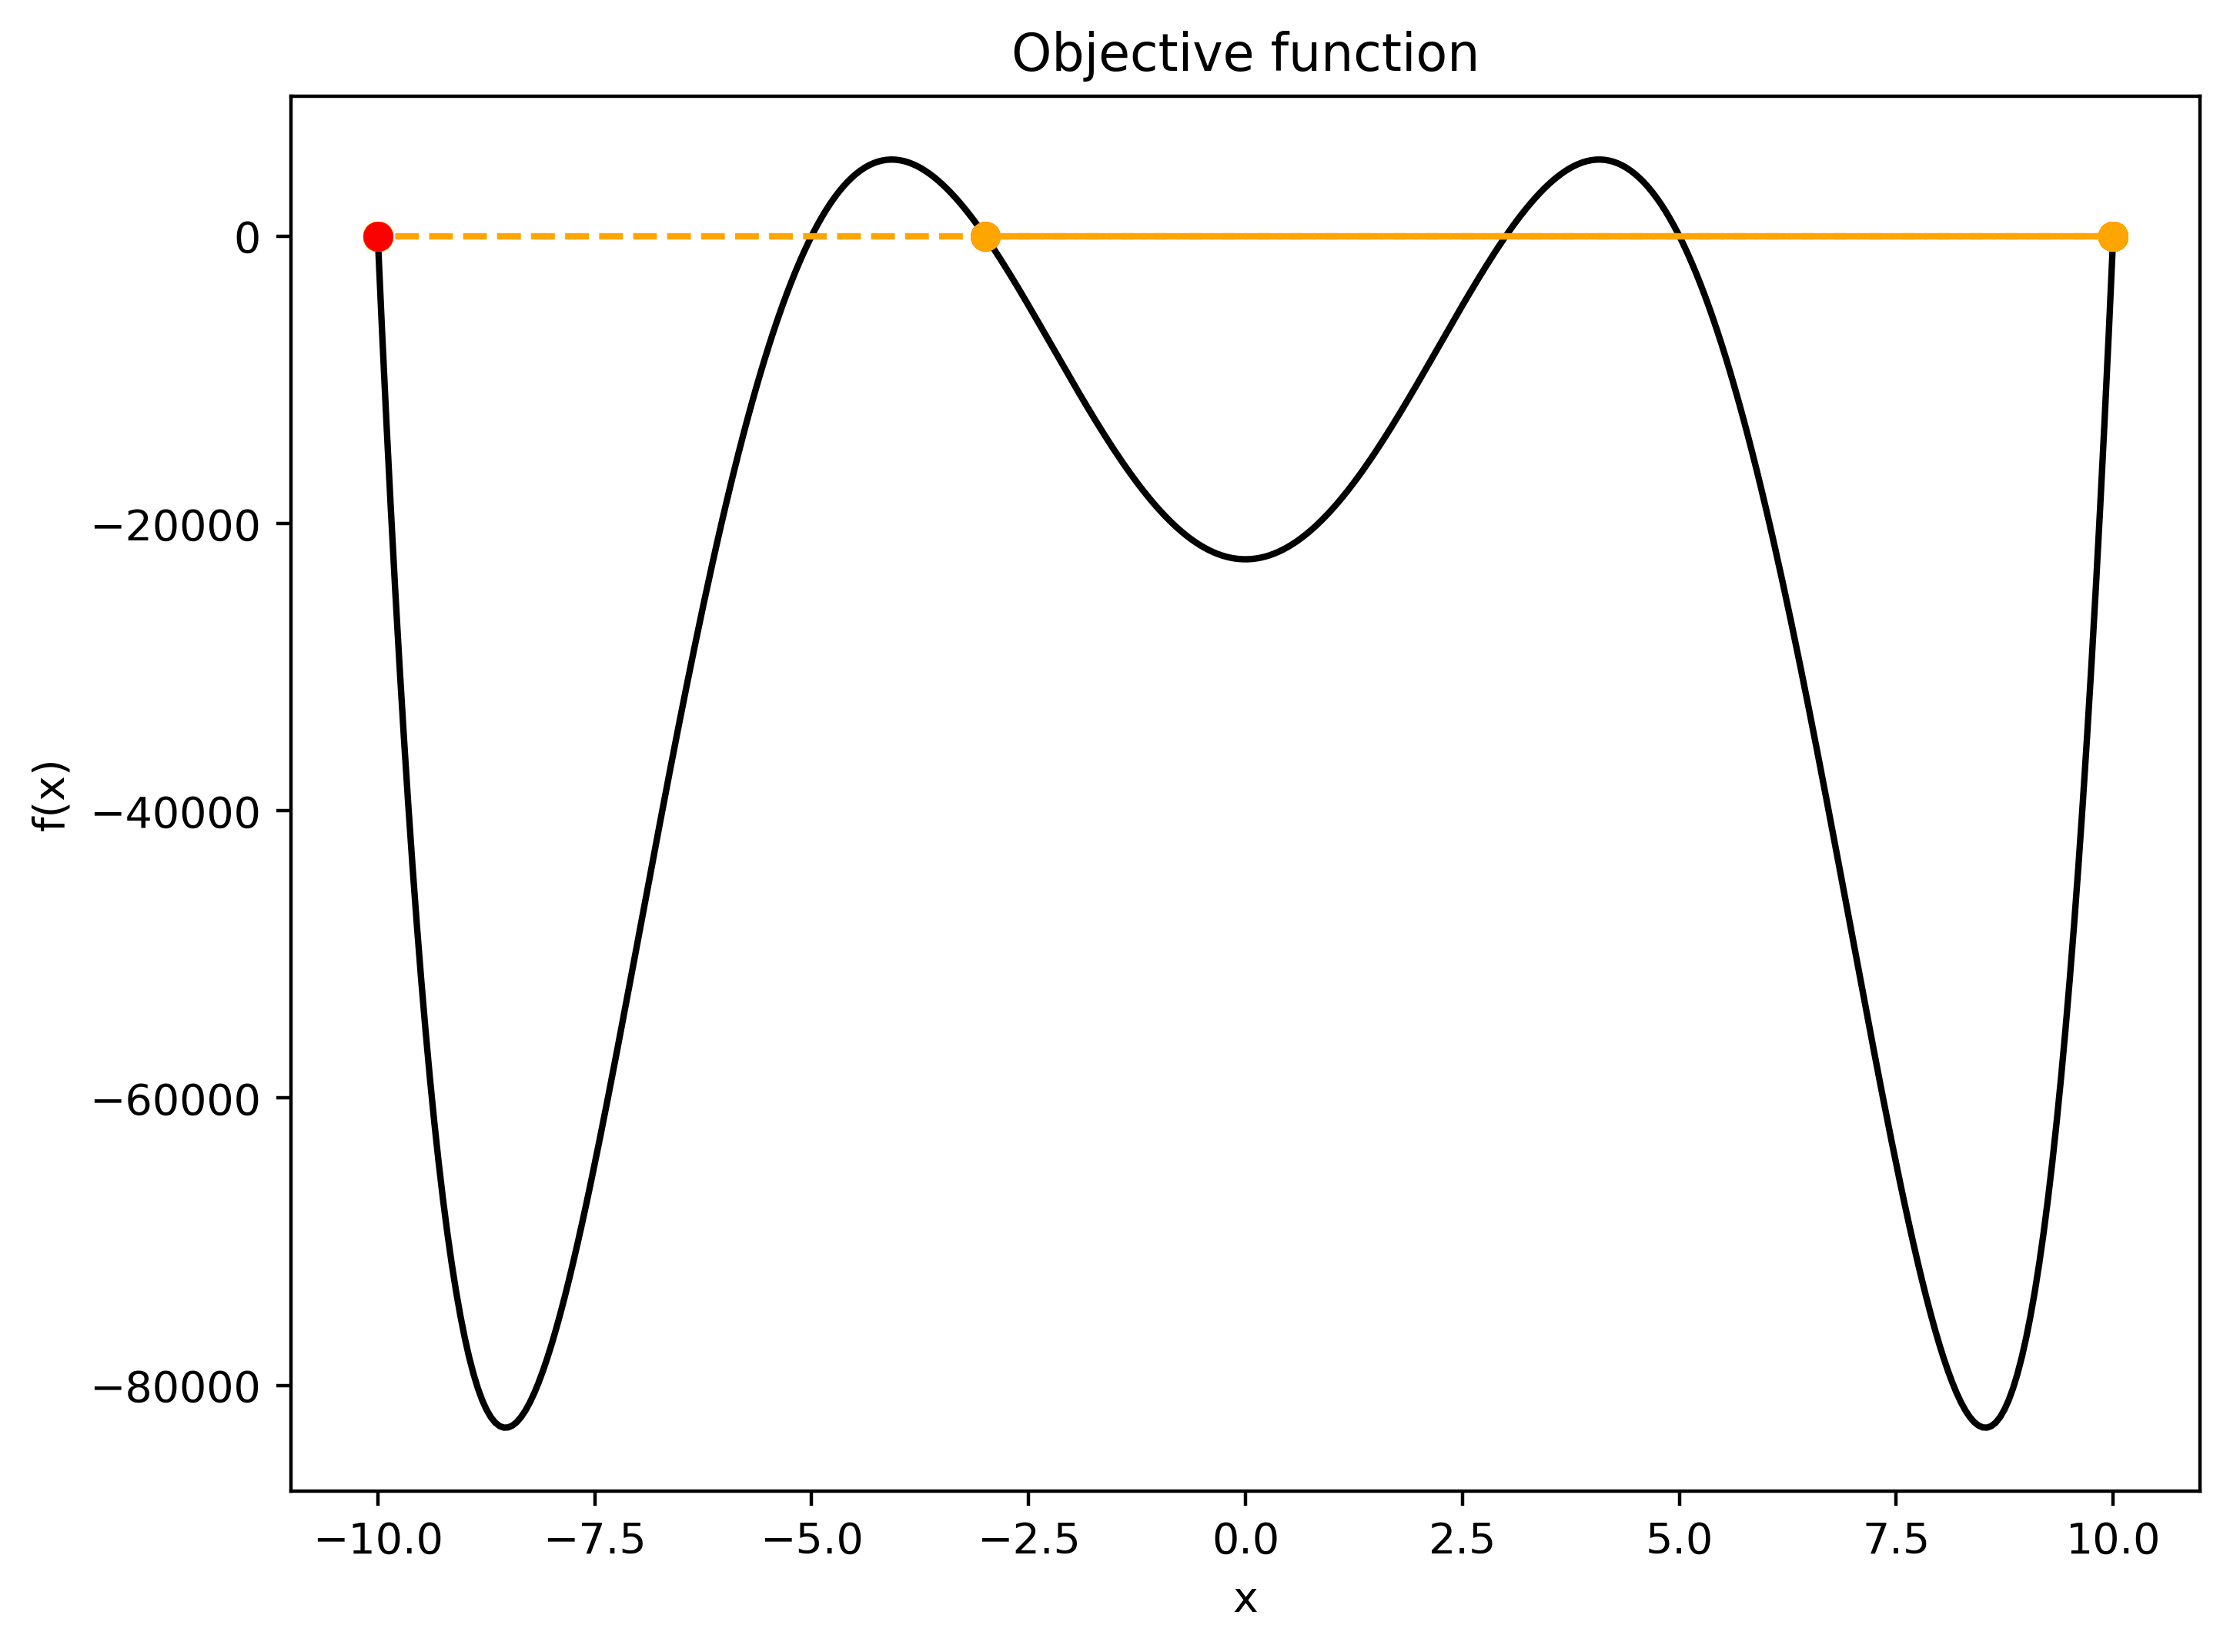

Gradient descent does not converge.


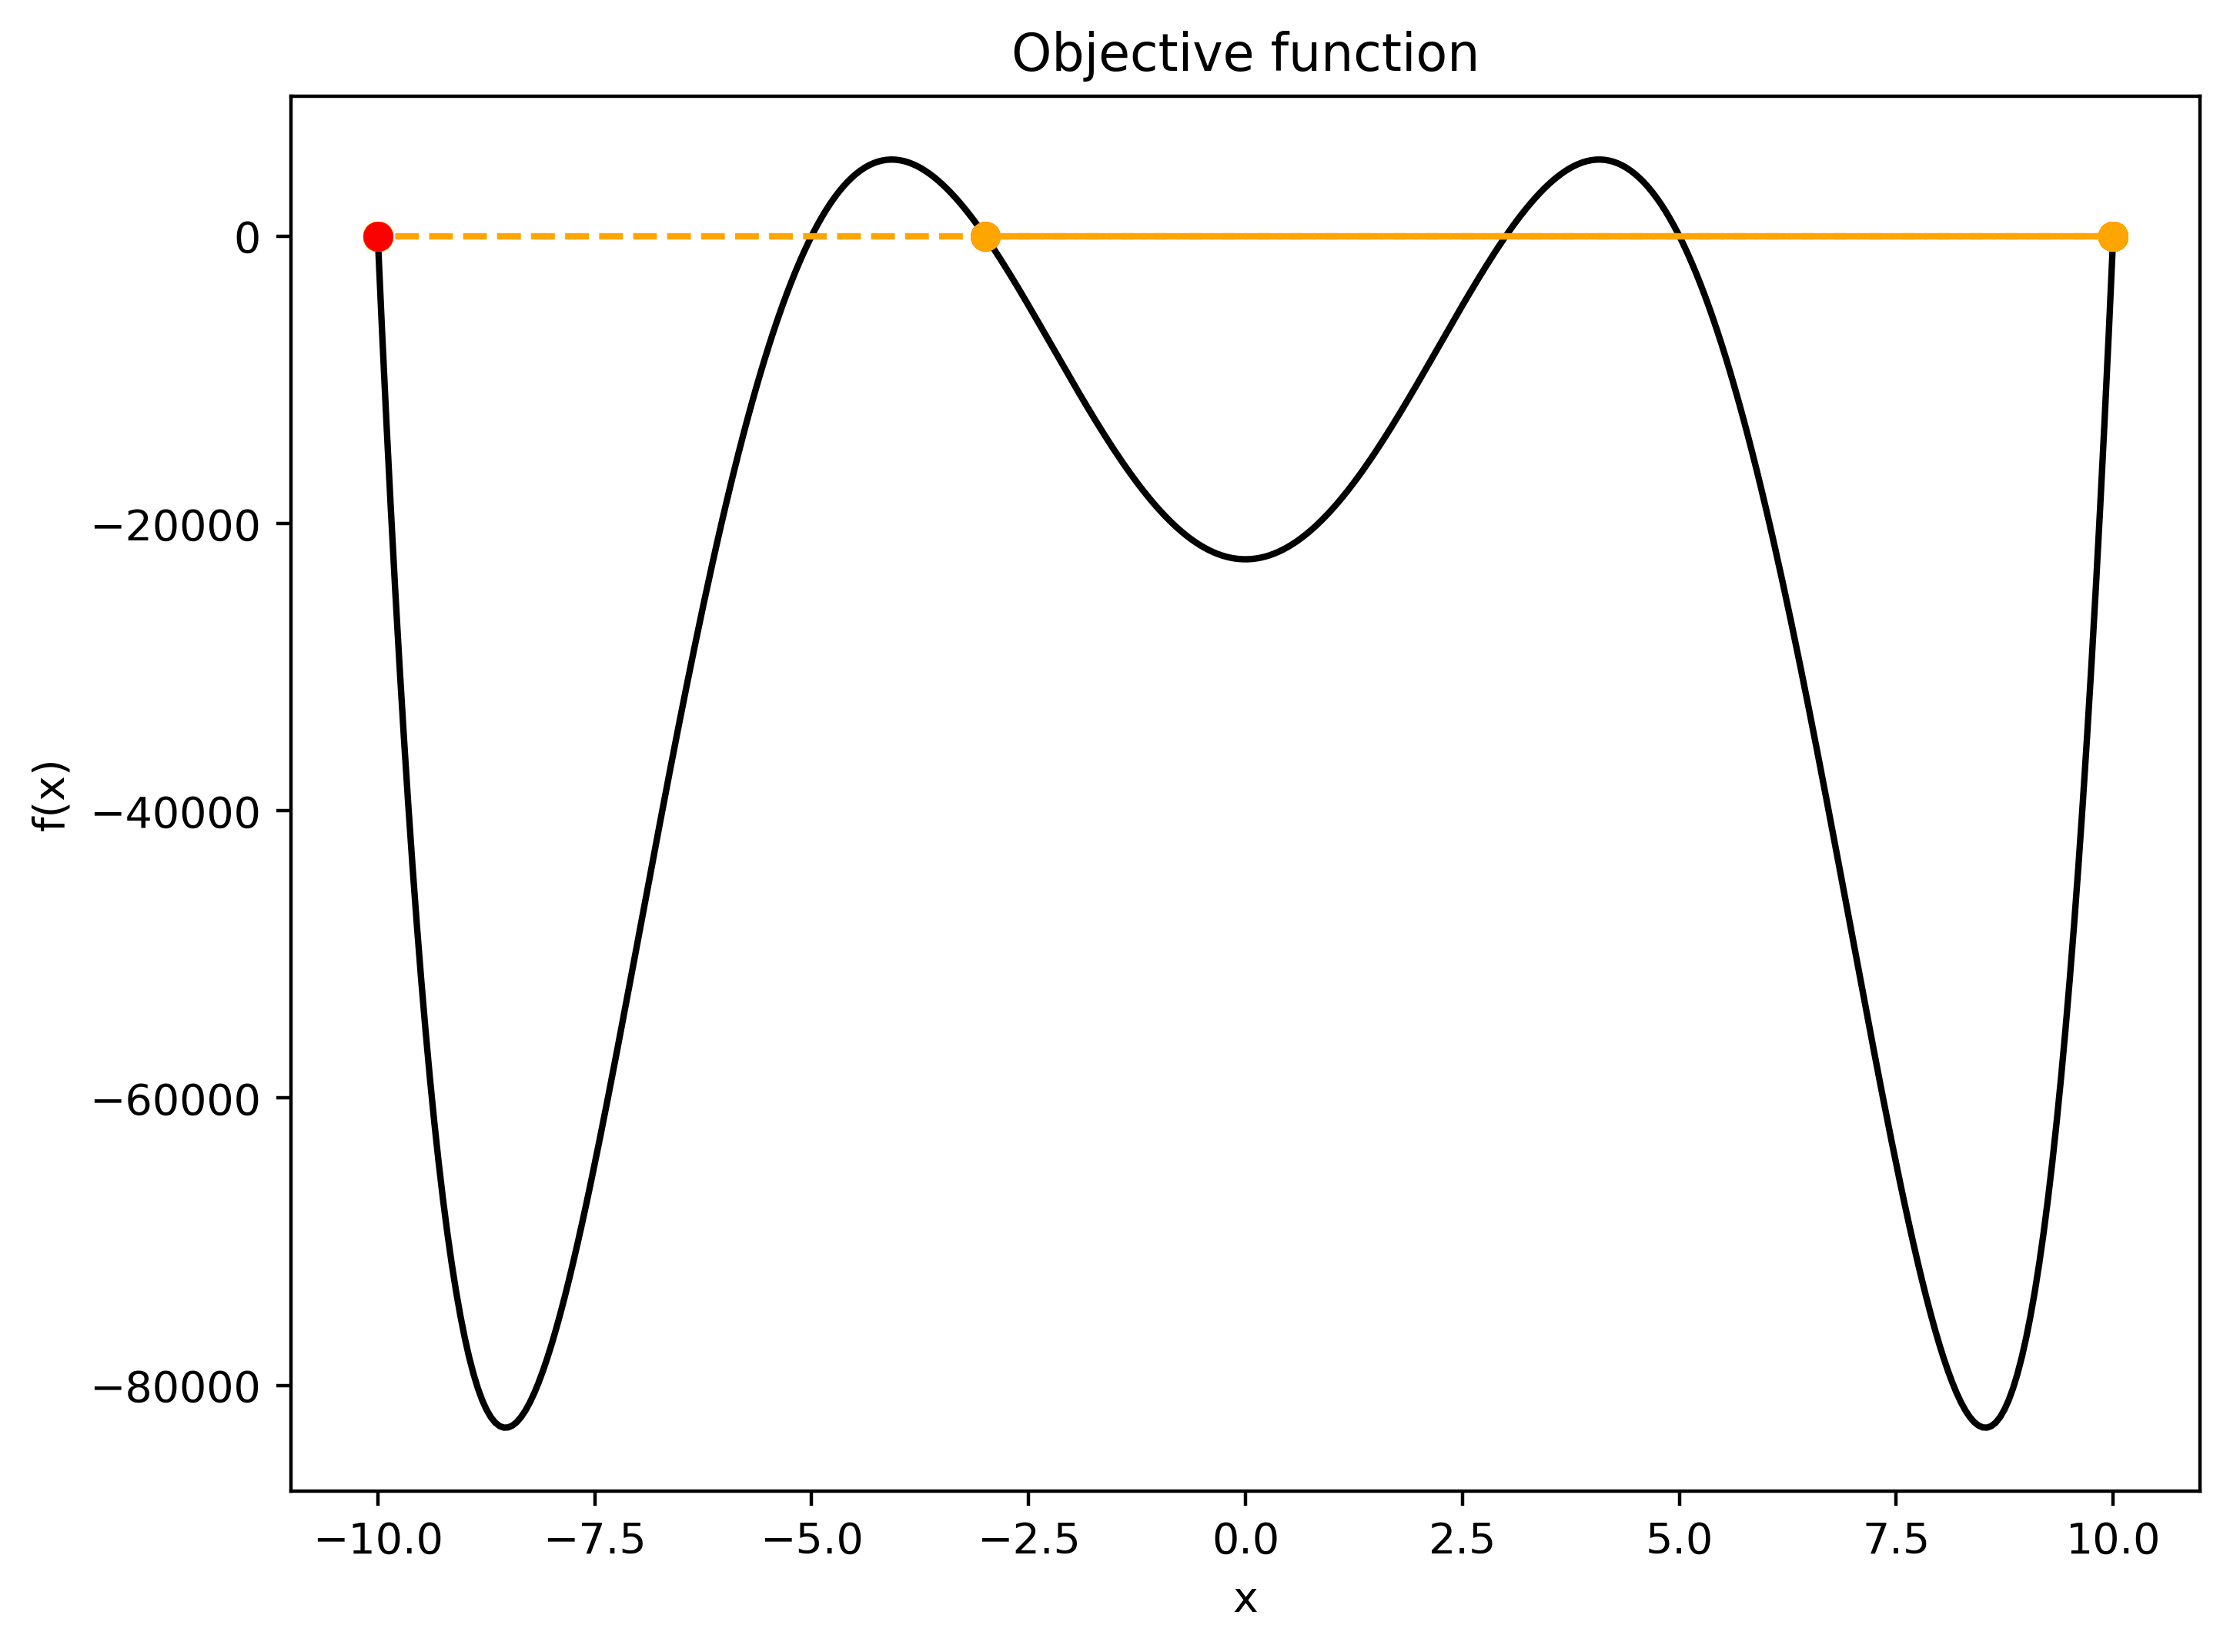

Solution found:
  y = -22500.0000
  x = -0.0000


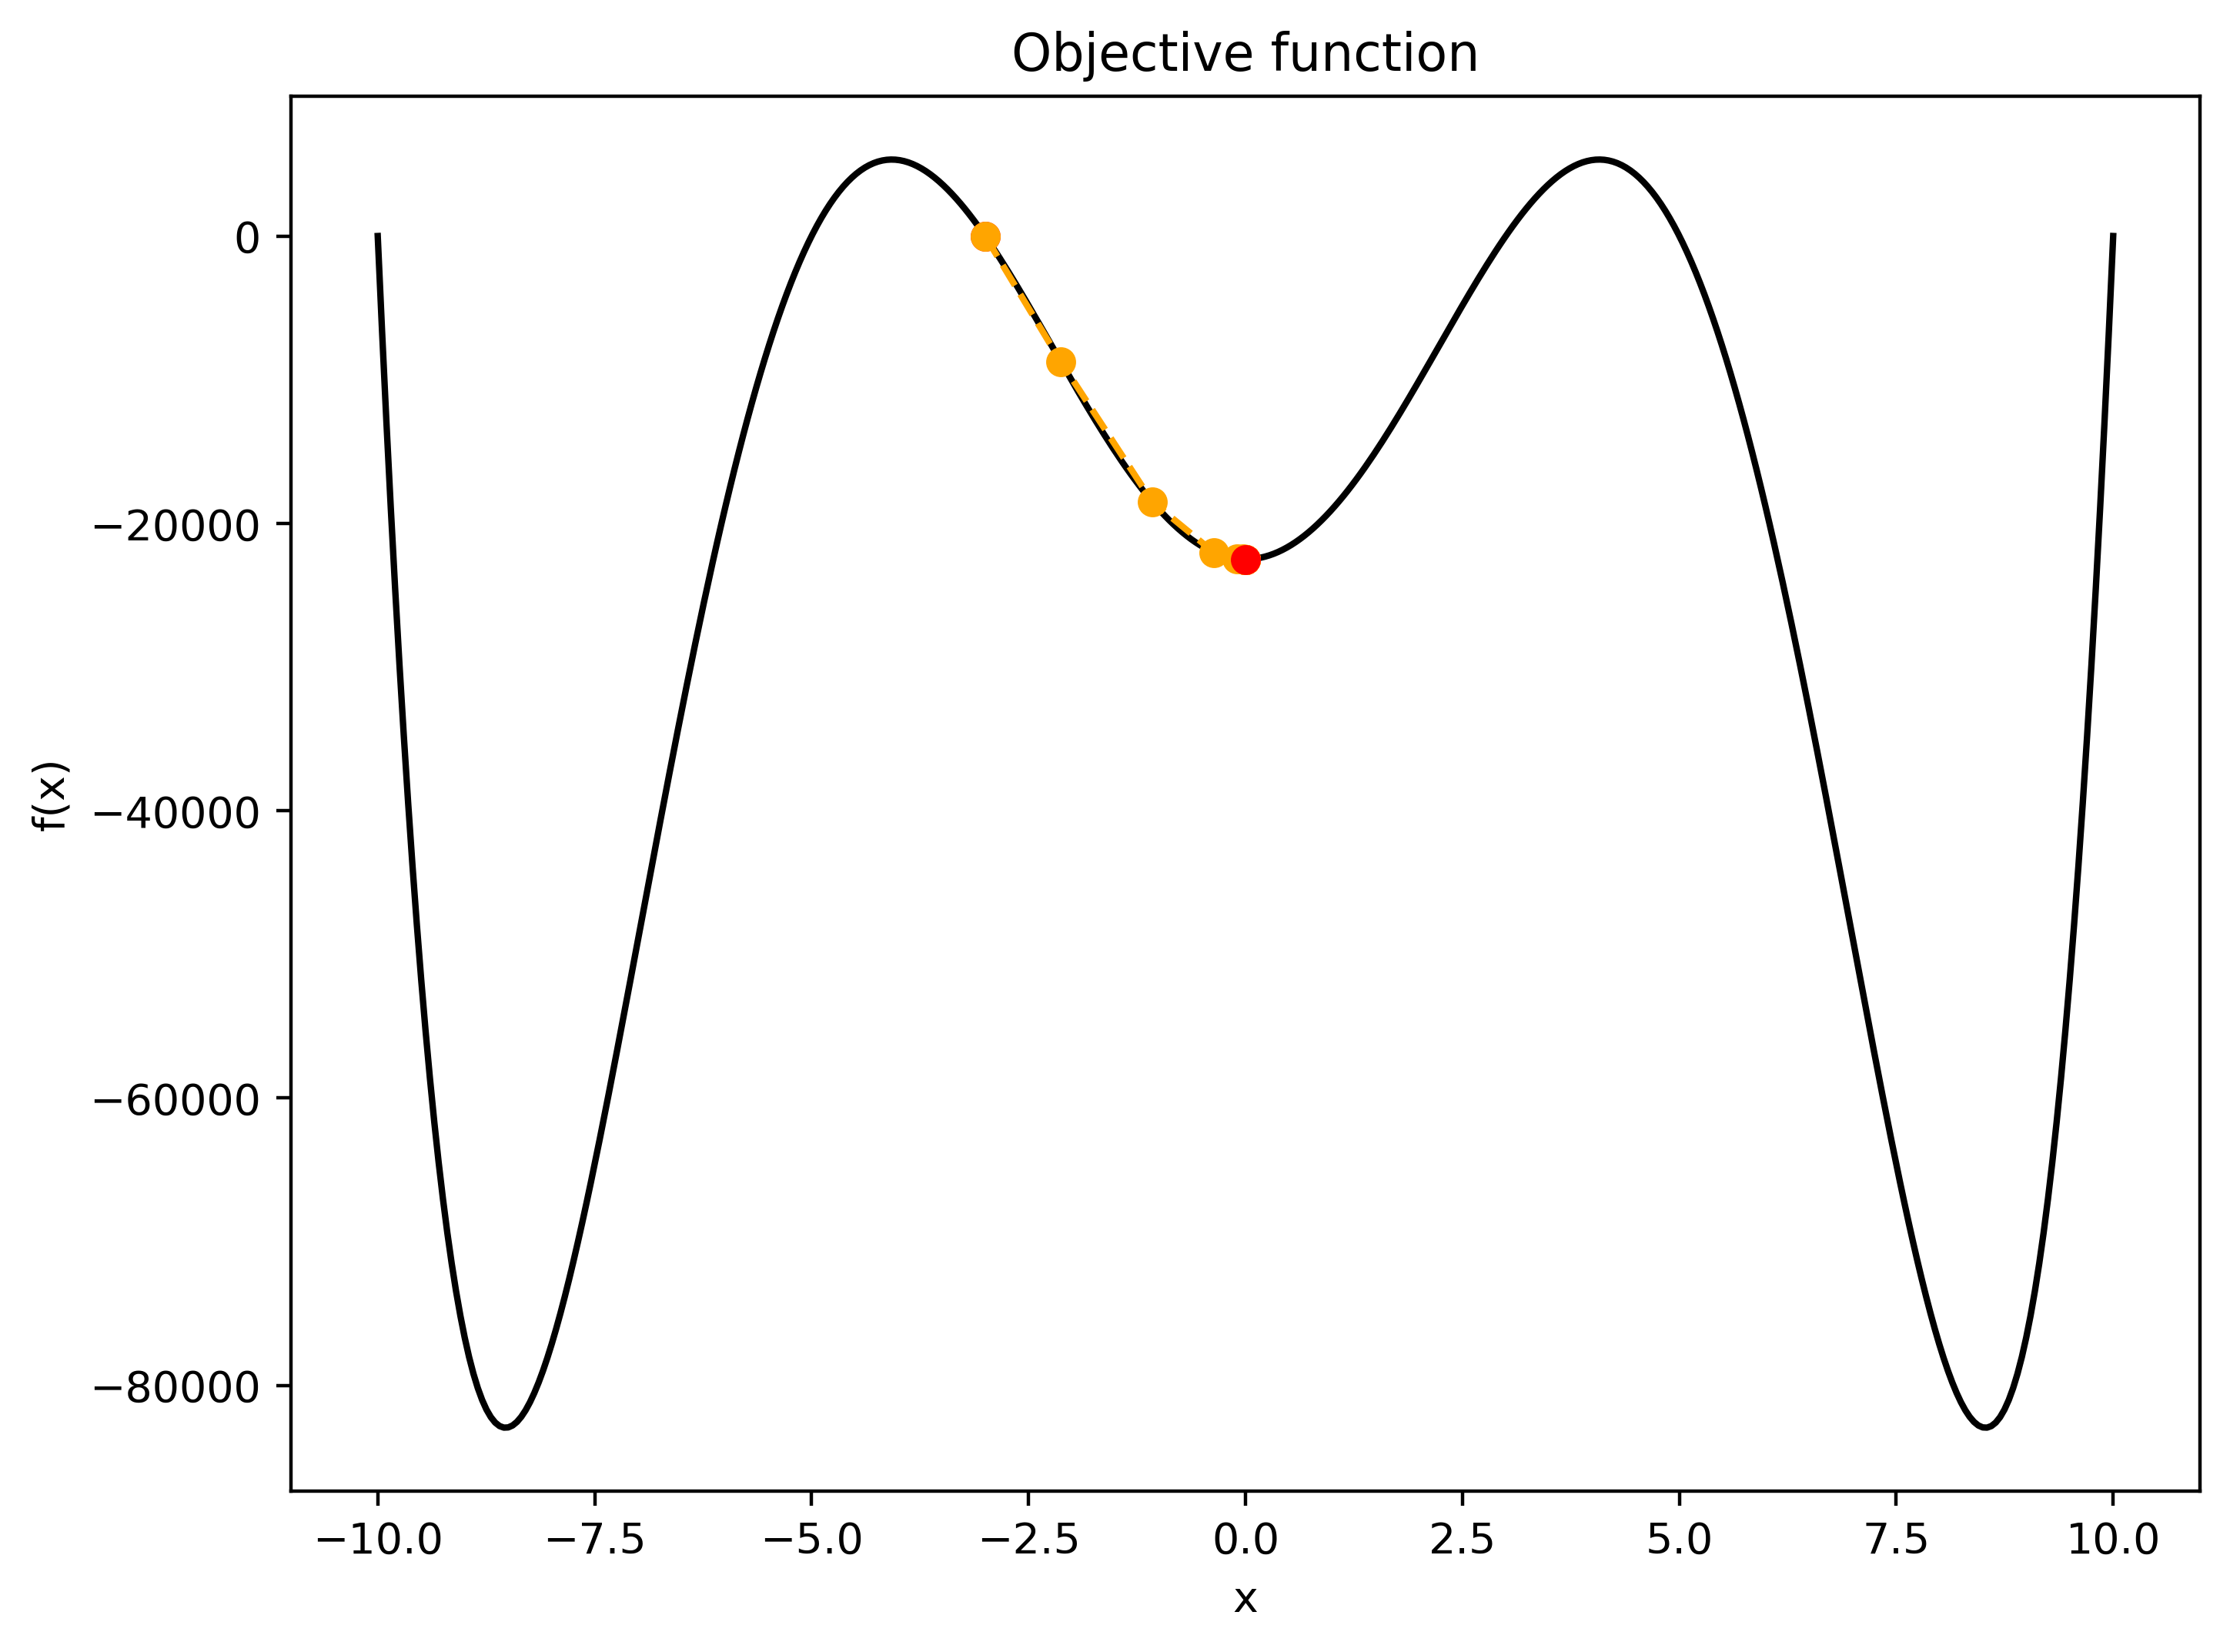

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# define functions to do gradient descent and plot results

def GradientDescentSimple(func, fprime, x0, alpha, tol=1e-5, max_iter=1000):
    # initialize x, f(x), and -f'(x)
    xk = x0
    fk = func(xk)
    pk = -fprime(xk)
    
    # initialize number of iterations, save x and f(x) as lists to keep track
    num_iter = 0
    curve_x = [xk]
    curve_y = [fk]
    
    # iterate until convergence or max iterations
    while abs(pk) > tol and num_iter < max_iter:
        # calculate new x, f(x), and -f'(x)
        new_xk = xk + alpha * pk
        
        # limit the absolute value of x to prevent overflow
        if abs(new_xk) > 10:
            new_xk = np.sign(new_xk) * 10
        
        xk = new_xk
        fk = func(xk)
        pk = -fprime(xk)
        
        # increase number of iterations by 1, save new x and f(x)
        num_iter += 1
        curve_x.append(xk)
        curve_y.append(fk)
    
    # print results / stopping criteria
    if num_iter == max_iter:
        print('Gradient descent does not converge.')
    else:
        print('Solution found:\n  y = {:.4f}\n  x = {:.4f}'.format(fk, xk))
    
    return curve_x, curve_y

def plotFunc(x0, function):
    x = np.linspace(-10, 10, 400)  # range of x values
    plt.figure(figsize=(8,6), dpi=400)
    plt.plot(x, function(x), color='black')  # plot graph of objective function
    plt.plot(x0, function(x0), 'ro')  # red dot on the initial condition
    plt.xlabel('x')  # x-axis label
    plt.ylabel('f(x)')  # y-axis label
    plt.title('Objective function')  # title

def plotPath(xs, ys, x0, function):
    plotFunc(x0, function)
    plt.plot(xs, ys, linestyle='--', marker='o', color='orange')
    plt.plot(xs[-1], ys[-1], 'ro')  # plot last x and f(x)
    plt.show()

# minimze the given function

# define
def f(x):
    return x**6 - 134*x**4 + 3625*x**2 - 22500

# derivative
def fprime(x):
    return 6*x**5 - 536*x**3 + 7250*x

# initial point
x0 = -3

# learning rate of 0.01
alpha = 0.01
xs, ys = GradientDescentSimple(f, fprime, x0, alpha)
plotPath(xs, ys, x0, f)

# larger learning rate (0.1)
alpha = 0.1
xs, ys = GradientDescentSimple(f, fprime, x0, alpha)
plotPath(xs, ys, x0, f)

# smaller learning rate (0.0001)
alpha = 0.0001
xs, ys = GradientDescentSimple(f, fprime, x0, alpha)
plotPath(xs, ys, x0, f)


Starting with an initial point of $x_0 = 3$, gradient descent converges to a local minimum at $x = 0$. To find a global minimum, different initial points can be tried and the solutions can be compared. The smallest one is likely the global minimum.

Analytically, we can find that the global minimum of the objective function is at $x \thickapprox -8.53$ and $x \thickapprox 8.53$.

Here, we can try $x_0 = -10$ as we can see it is near one of the global minimums.

In practice, for higher-dimensional objective functions (non-convex), gradient descent can be attempted with multiple initial points chosen at random, and the lowest solution can be retained. This increases the probability of finding the global minimum, although not guaranteeing it.

Solution found:
  y = -22500.0000
  x = 0.0000


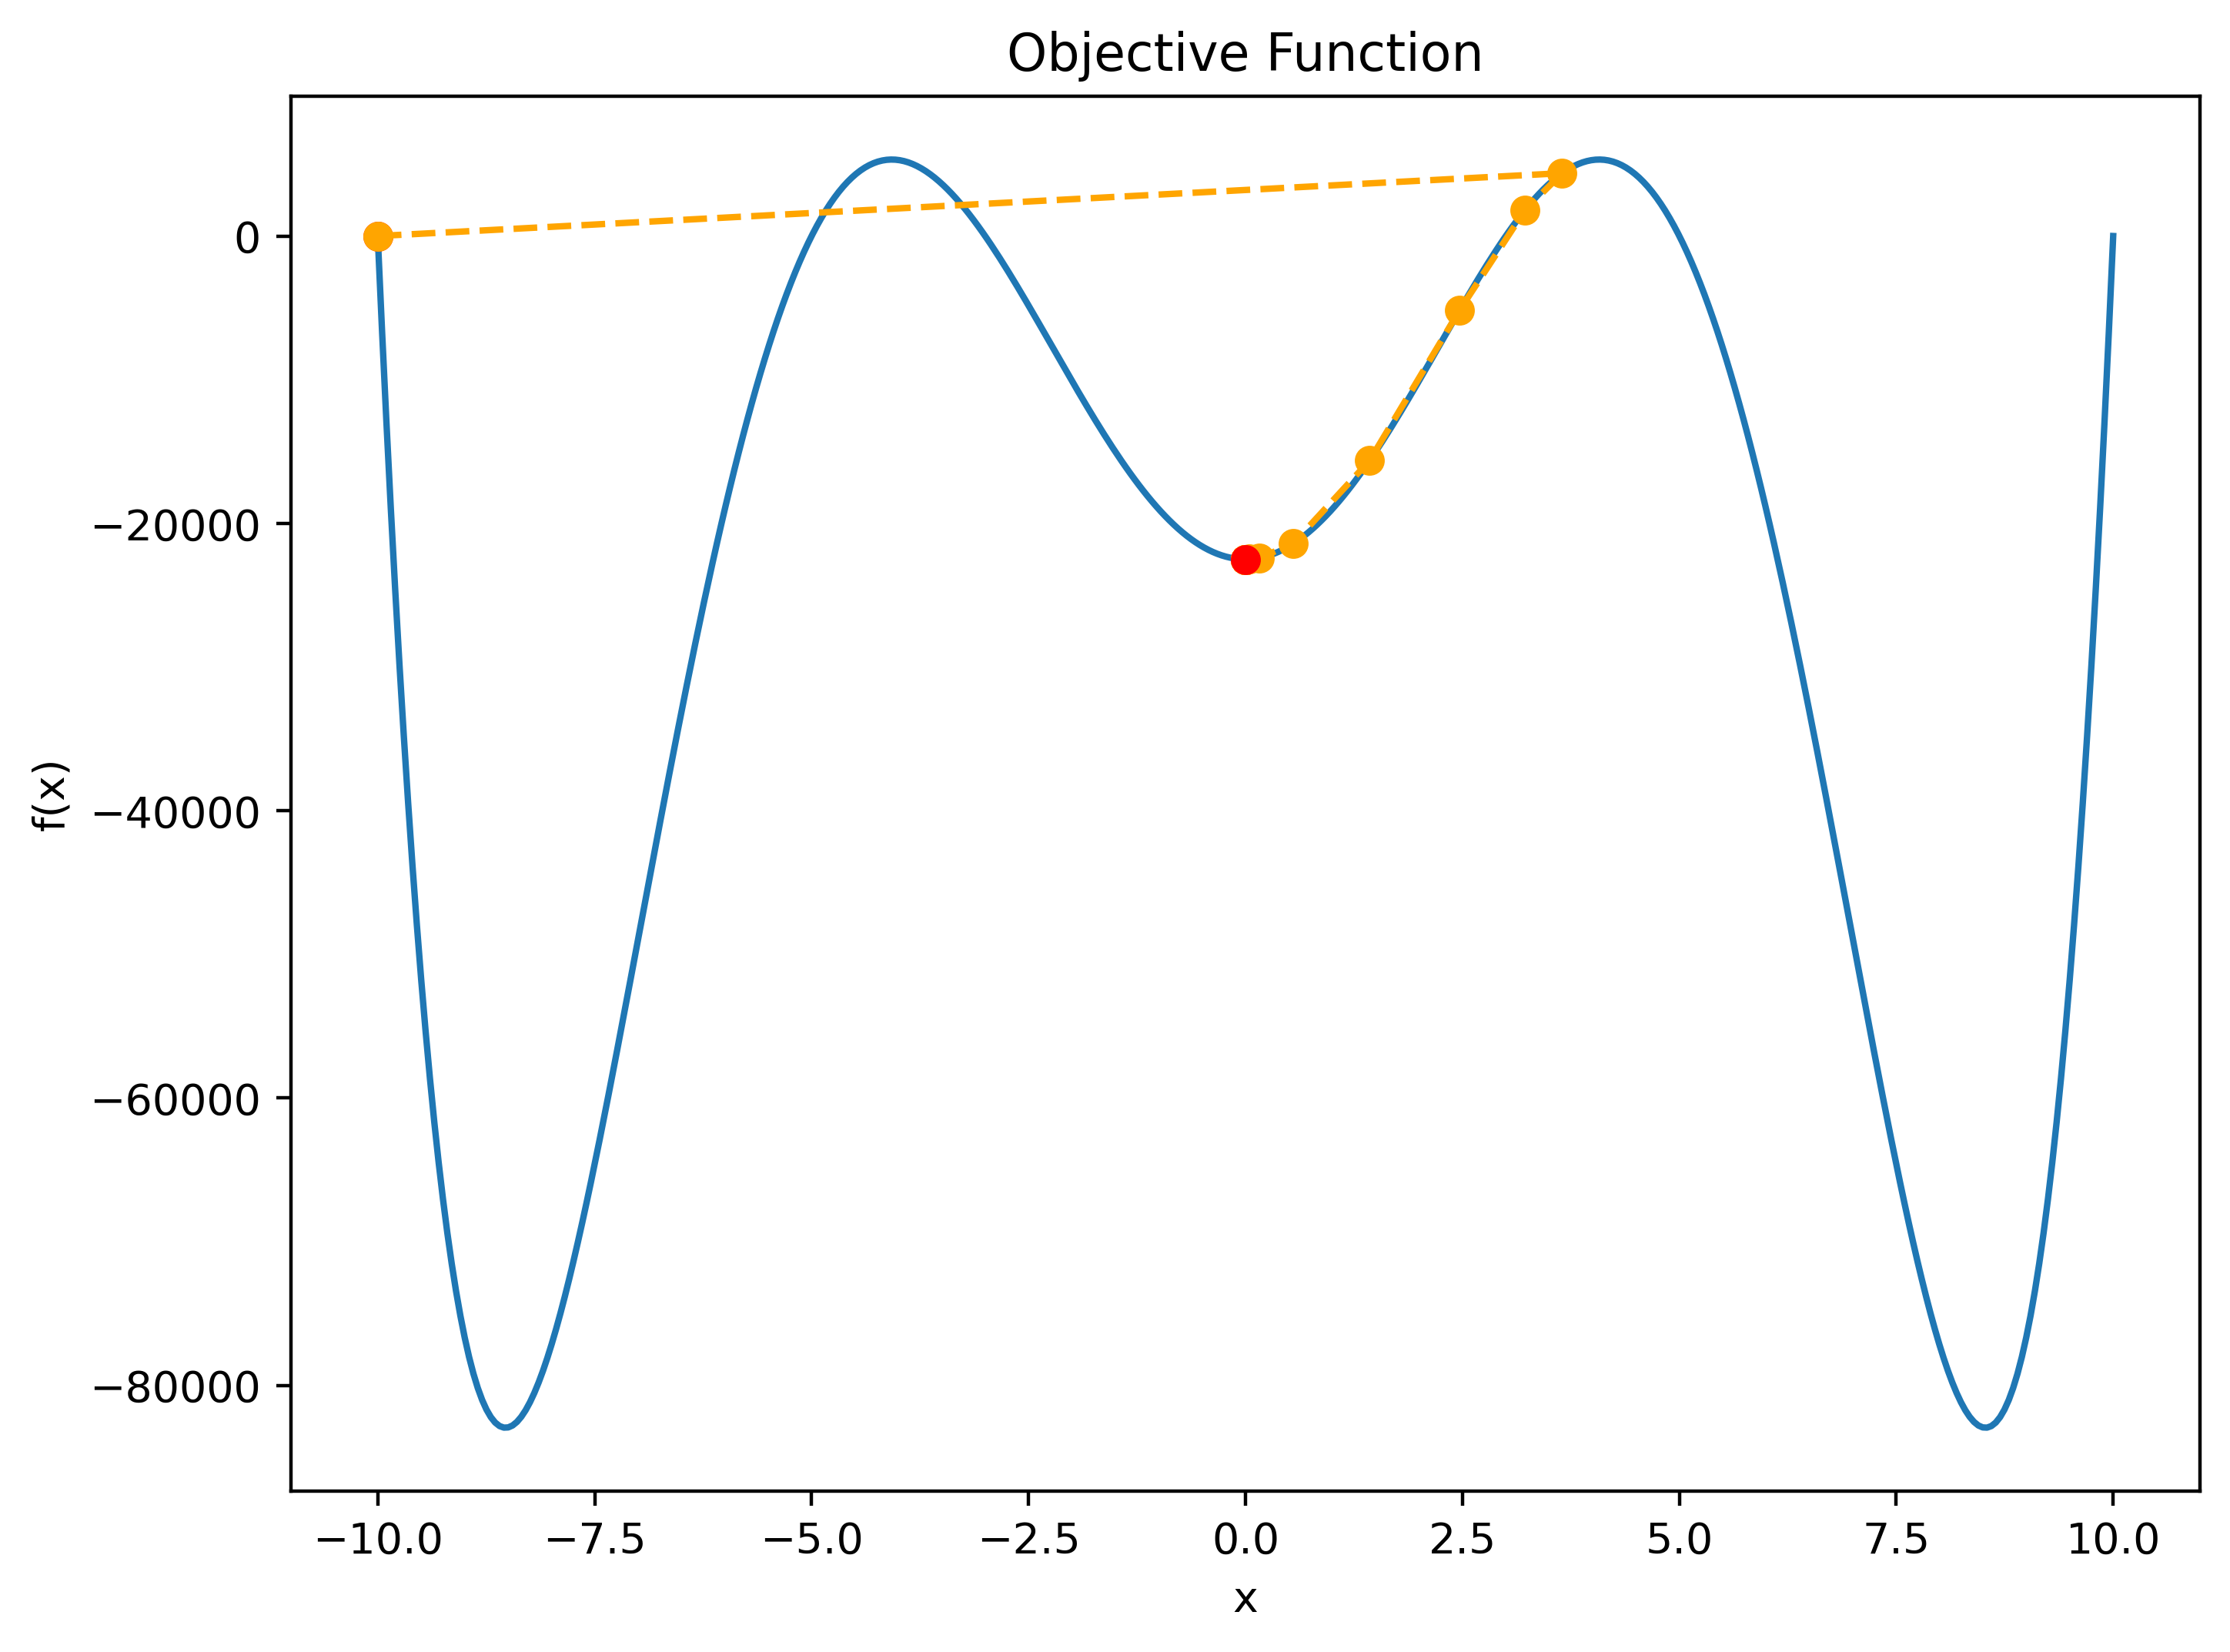

Solution found:
  y = -82950.7992
  x = -8.5274


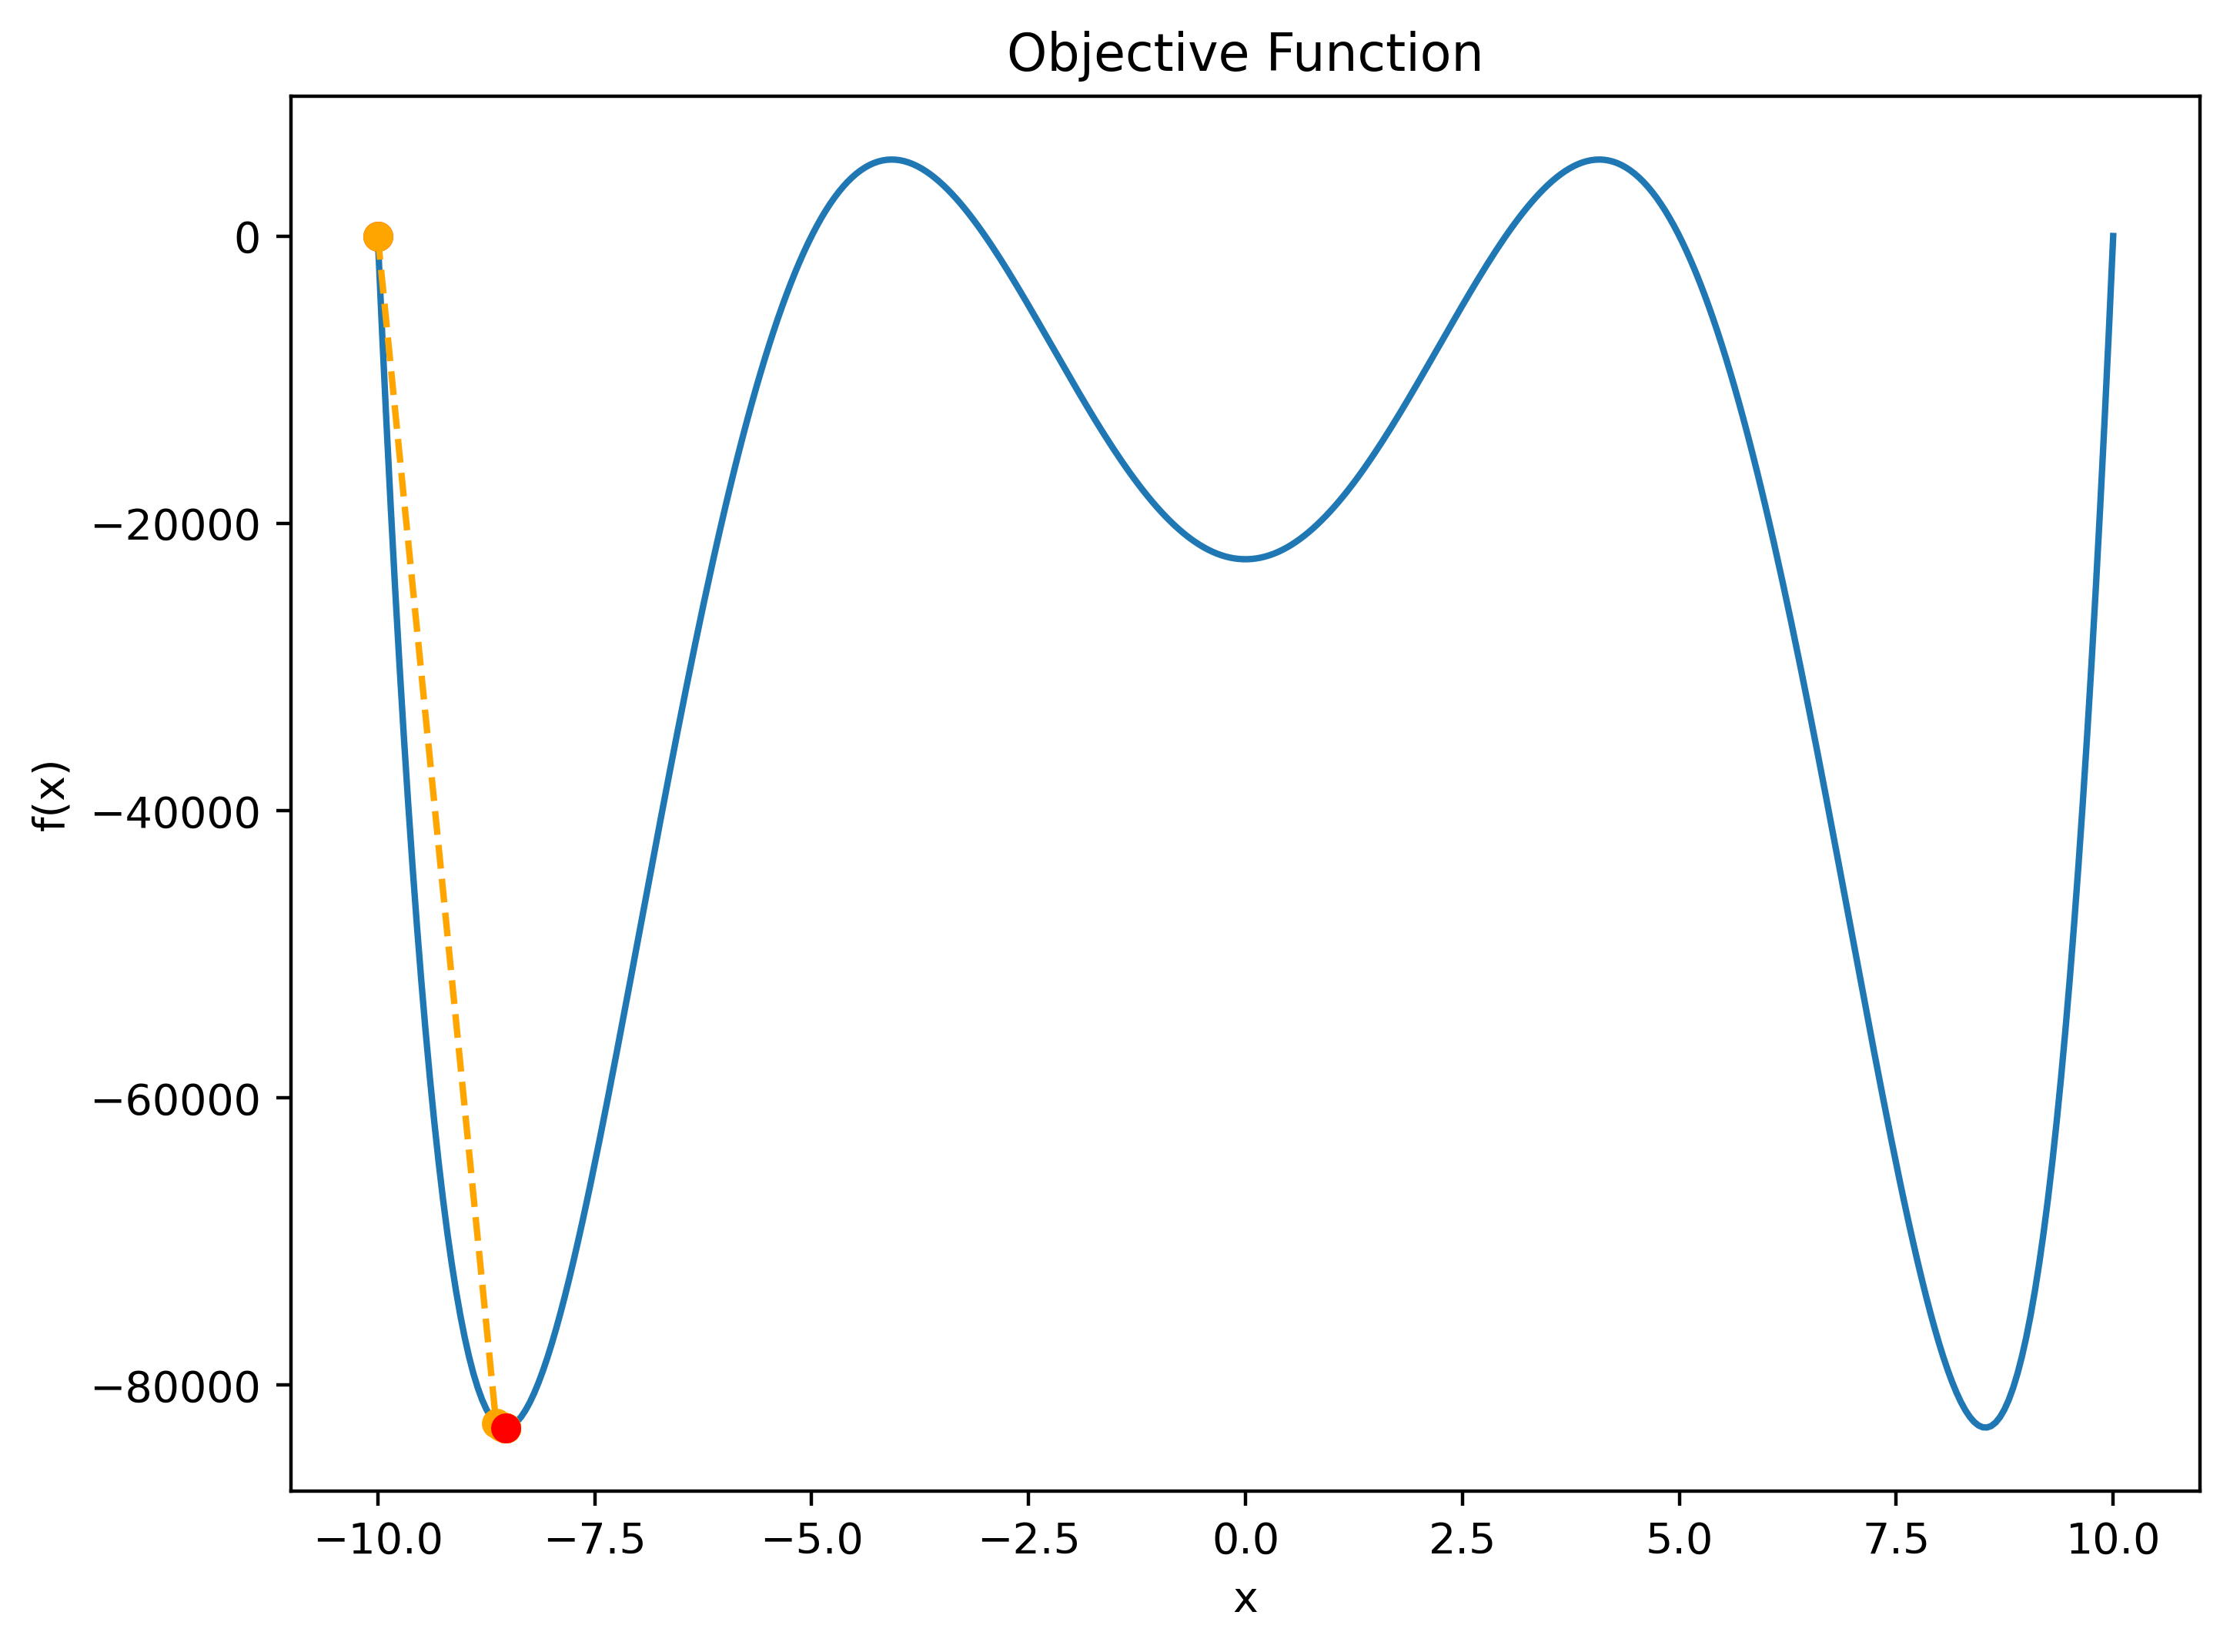

In [31]:
# to find global minimum, try different initial points

x0 = -10

alpha = 0.0001
xs, ys = GradientDescentSimple(f, fprime, x0, alpha)
plotPath(xs, ys, x0, f)

alpha = 0.00001
xs, ys = GradientDescentSimple(f, fprime, x0, alpha)
plotPath(xs, ys, x0, f)